In [1]:
import os

from dcapy import dca
from dcapy.models import CashFlow, ChgPts, CashFlowModel, Period, Scenario

import numpy as np 
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
import seaborn as sns

In [18]:
p1_dict = {
    'name':'pdp',
    'dca': {
        'ti':'2021-01-01',
        'bsw':0.3,
        'slope':[2e-5,1e-5],
        'fluid_rate':1000,
        'gor':0.3
    },
    'start':'2021-01-01',
    'end':'2021-01-10',
    'freq_input':'D',
    'freq_output':'D',
    'cashflow_params':[
            {
                'name':'fix_opex',
                'const_value':-5000,
                'target':'opex',
            },
            {
                'name':'var_opex',
                'const_value':-5,
                'target':'opex',
                'multiply':'oil_volume'
            },
            {
                'name':'income',
                'const_value':60,
                'target':'income',
                'multiply':'oil_volume'
            }
        ]
}

p1 = Period(**p1_dict)
p1

Period(name='pdp', dca=Wor(bsw=0.3, slope=[2e-05, 1e-05], fluid_rate=1000.0, ti=datetime.date(2021, 1, 1), seed=None, gor=0.3, glr=None), start=datetime.date(2021, 1, 1), end=datetime.date(2021, 1, 10), time_list=None, freq_input='D', freq_output='D', rate_limit=None, cum_limit=None, iter=1, ppf=None, cashflow_params=[CashFlowParams(name='fix_opex', iter=1, const_value=-5000.0, periods=None, array_values=None, target='opex', multiply=None, agg='sum', wi=1, depends=False), CashFlowParams(name='var_opex', iter=1, const_value=-5.0, periods=None, array_values=None, target='opex', multiply='oil_volume', agg='sum', wi=1, depends=False), CashFlowParams(name='income', iter=1, const_value=60.0, periods=None, array_values=None, target='income', multiply='oil_volume', agg='sum', wi=1, depends=False)], cashflow=None, depends=None, forecast=None)

In [19]:
f1 = p1.generate_forecast()
f1.head()

,oil_rate,water_rate,oil_cum,water_cum,bsw,wor,wor_1,delta_time,fluid_rate,fluid_cum,iteration,oil_volume,water_volume,gas_cum,gas_volume,gas_rate,period
date,,,,,,,,,,,,,,,,,
2021-01-01,700.000000,300.000000,700.000000,300.000000,0.300000,0.428571,1.428571,1.0,1000.0,1000.0,0,697.051793,302.948207,210.000000,210.000000,210.000000,pdp
2021-01-02,697.051793,302.948207,1397.051793,602.948207,0.302948,0.434614,1.434614,1.0,1000.0,2000.0,0,695.575794,304.424206,419.115538,209.115538,209.115538,pdp
2021-01-03,694.099795,305.900205,2091.151588,908.848412,0.305900,0.440715,1.440715,1.0,1000.0,3000.0,0,692.622088,307.377912,627.345476,208.229938,208.229938,pdp
2021-01-04,691.144380,308.855620,2782.295968,1217.704032,0.308856,0.446876,1.446876,1.0,1000.0,4000.0,0,689.665152,310.334848,834.688790,207.343314,207.343314,pdp
2021-01-05,688.185924,311.814076,3470.481893,1529.518107,0.311814,0.453096,1.453096,1.0,1000.0,5000.0,0,686.705362,313.294638,1041.144568,206.455777,206.455777,pdp


In [22]:
p1.forecast.df()['gas_rate'].values

array([210.        , 209.11553795, 208.22993843, 207.3433141 ,
       206.45577727, 205.56743975, 204.67841284, 203.78880723,
       202.89873299, 210.        , 209.55838354, 209.11647051,
       208.67427499, 208.23181101, 207.7890926 , 207.34613377,
       206.90294847, 206.45955066])

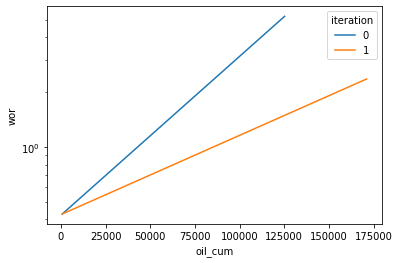

In [15]:
fig, ax = plt.subplots()
sns.lineplot(data=f1,x='oil_cum',y='wor', hue='iteration',ax=ax)
ax.set_yscale('log')

<AxesSubplot:xlabel='date', ylabel='oil_rate'>

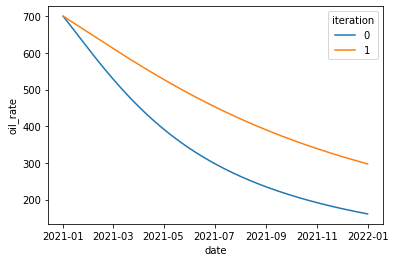

In [5]:
sns.lineplot(data=f1,x=f1.index.to_timestamp(),y='oil_rate', hue='iteration')

In [24]:
c1=p1.generate_cashflow()

In [28]:
p1.cashflow[0].fcf()

,income,total_income,fix_opex,var_opex,total_opex,total_capex,fcf,cum_fcf
2021-01-01,41823.107590,41823.107590,-5000.0,-3485.258966,-8485.258966,0,33337.848625,33337.848625
2021-01-02,41734.547638,41734.547638,-5000.0,-3477.878970,-8477.878970,0,33256.668668,66594.517293
2021-01-03,41557.325253,41557.325253,-5000.0,-3463.110438,-8463.110438,0,33094.214815,99688.732108
2021-01-04,41379.909138,41379.909138,-5000.0,-3448.325761,-8448.325761,0,32931.583376,132620.315484
2021-01-05,41202.321703,41202.321703,-5000.0,-3433.526809,-8433.526809,0,32768.794894,165389.110379
2021-01-06,41024.585259,41024.585259,-5000.0,-3418.715438,-8418.715438,0,32605.869821,197994.980199
2021-01-07,40846.722007,40846.722007,-5000.0,-3403.893501,-8403.893501,0,32442.828506,230437.808705
2021-01-08,40668.754022,40668.754022,-5000.0,-3389.062835,-8389.062835,0,32279.691186,262717.499892
2021-01-09,40579.746597,40579.746597,-5000.0,-3381.645550,-8381.645550,0,32198.101048,294915.600939


In [7]:
p1.cashflow[1].npv([0.05,0.1,0.15])

,npv
0.05,668547.948997
0.10,359074.449549
0.15,252330.665366


In [8]:
p1.cashflow[1].irr()

nan

<AxesSubplot:xlabel='date', ylabel='oil_rate'>

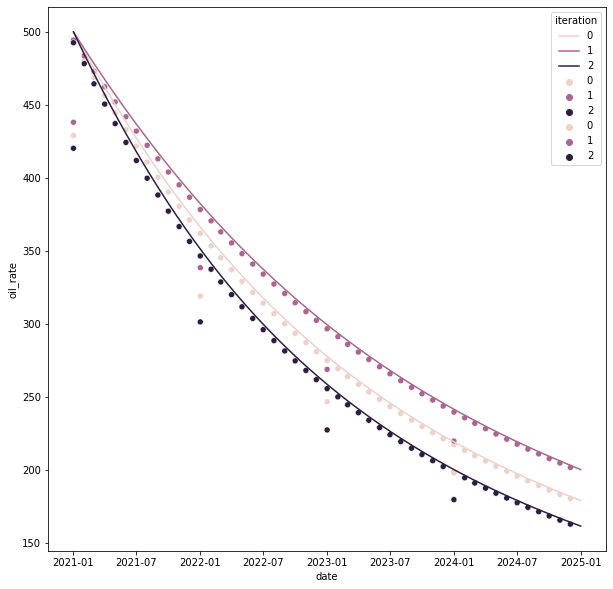

In [37]:
bsw = 0.5
slope = [3.5e-6,3e-6,4e-6]
ti =  date(2021,1,1)

w1 = dca.Wor(bsw=bsw,slope=slope,ti=ti, glr=0.3, fluid_rate = 1000,)

data1 = dict(
    start = date(2021,1,1),
    end = date(2025,1,1),
    freq_input = 'D',
    freq_output = 'D',
    rate_limit = 80,
)

fw1=w1.forecast(**data1)

data2 = dict(
    start = date(2021,1,1),
    end = date(2025,1,1),
    freq_input = 'D',
    freq_output = 'M',
    rate_limit = 80,
)

fw2=w1.forecast(**data2)

data3 = dict(
    start = date(2021,1,1),
    end = date(2025,1,1),
    freq_input = 'D',
    freq_output = 'A',
    rate_limit = 80,
)

fw3=w1.forecast(**data3)

fig, ax = plt.subplots(figsize=(10,10))

sns.lineplot(data=fw1,x=fw1.index.to_timestamp(),y='oil_rate', hue='iteration', ax=ax)

sns.scatterplot(data=fw2,x=fw2.index.to_timestamp(),y='oil_rate', hue='iteration', ax=ax)

sns.scatterplot(data=fw3,x=fw3.index.to_timestamp(),y='oil_rate', hue='iteration', ax=ax)

In [36]:
fw3.head(31)

,iteration,oil_rate,water_rate,oil_cum,gas_rate,water_cum,bsw,wor,wor_1,delta_time,fluid_rate,fluid_cum,gas_cum,oil_volume,water_volume,gas_volume
date,,,,,,,,,,,,,,,,
2021,0,429.035826,570.964174,156598.076477,300.0,2.084019e+05,0.570964,1.349751,2.349751,1.0,1000.0,365000.0,109500.0,156531.011176,208468.988824,109500.0
2021,1,438.121632,561.878368,159914.395636,300.0,2.050856e+05,0.561878,1.296249,2.296249,1.0,1000.0,365000.0,109500.0,159855.364521,205144.635479,109500.0
2021,2,420.283007,579.716993,153403.297601,300.0,2.115967e+05,0.579717,1.404307,2.404307,1.0,1000.0,365000.0,109500.0,153328.665312,211671.334688,109500.0
2022,0,319.030868,680.969132,273044.343471,300.0,4.569557e+05,0.680969,2.154572,3.154572,1.0,1000.0,730000.0,219000.0,116401.988014,248598.011986,109500.0
2022,1,338.441047,661.558953,283445.377769,300.0,4.465546e+05,0.661559,1.969501,2.969501,1.0,1000.0,730000.0,219000.0,123489.506924,241510.493076,109500.0
2022,2,301.318708,698.681292,263384.626114,300.0,4.666154e+05,0.698681,2.344811,3.344811,1.0,1000.0,730000.0,219000.0,109934.983897,255065.016103,109500.0
2023,0,246.592877,753.407123,363050.743523,300.0,7.319493e+05,0.753407,3.074284,4.074284,1.0,1000.0,1095000.0,328500.0,89977.096222,275022.903778,109500.0
2023,1,268.801908,731.198092,381558.074114,300.0,7.134419e+05,0.731198,2.734559,3.734559,1.0,1000.0,1095000.0,328500.0,98083.746771,266916.253229,109500.0
2023,2,227.303406,772.696594,346350.369169,300.0,7.486496e+05,0.772697,3.423486,4.423486,1.0,1000.0,1095000.0,328500.0,82936.541410,282063.458590,109500.0


In [34]:
fw2

,iteration,oil_rate,water_rate,oil_cum,gas_rate,water_cum,bsw,wor,wor_1,delta_time,fluid_rate,fluid_cum,gas_cum,oil_volume,water_volume,gas_volume
date,,,,,,,,,,,,,,,,
2021-01,0,493.493421,506.506579,15298.296047,300.0,15701.703953,0.506507,1.026494,2.026494,1.0,1000.0,31000.0,9300.0,15291.385891,15708.614109,9300.0
2021-01,1,494.416044,505.583956,15326.897353,300.0,15673.102647,0.505584,1.022679,2.022679,1.0,1000.0,31000.0,9300.0,15320.963279,15679.036721,9300.0
2021-01,2,492.573111,507.426889,15269.766446,300.0,15730.233554,0.507427,1.030318,2.030318,1.0,1000.0,31000.0,9300.0,15261.883936,15738.116064,9300.0
2021-02,0,480.919285,519.080715,28764.036017,300.0,30235.963983,0.519081,1.079455,2.079455,1.0,1000.0,59000.0,17700.0,13459.857728,14540.142272,8400.0
2021-02,1,483.597121,516.402879,28867.616743,300.0,30132.383257,0.516403,1.067913,2.067913,1.0,1000.0,59000.0,17700.0,13535.647369,14464.352631,8400.0
2021-02,2,478.257613,521.742387,28660.979608,300.0,30339.020392,0.521742,1.091059,2.091059,1.0,1000.0,59000.0,17700.0,13384.530857,14615.469143,8400.0
2021-03,0,468.693946,531.306054,43293.548340,300.0,46706.451660,0.531306,1.133718,2.133718,1.0,1000.0,90000.0,27000.0,14523.181202,16476.818798,9300.0
2021-03,1,473.033705,526.966295,43531.661584,300.0,46468.338416,0.526966,1.114109,2.114109,1.0,1000.0,90000.0,27000.0,14658.562225,16341.437775,9300.0
2021-03,2,464.398863,535.601137,43057.344350,300.0,46942.655650,0.535601,1.153492,2.153492,1.0,1000.0,90000.0,27000.0,14389.203944,16610.796056,9300.0


In [40]:
p2_dict = {
    'name':'pdp',
    'dca': {
        'ti':0,
        'bsw':0.3,
        'slope':[2e-5,1e-5],
        'fluid_rate':1000,
        'gor':0.3
    },
    'start':0,
    'end':20,
    'freq_input':'D',
    'freq_output':'D',
    'cashflow_params':[
            {
                'name':'fix_opex',
                'const_value':-5000,
                'target':'opex',
            },
            {
                'name':'var_opex',
                'const_value':-5,
                'target':'opex',
                'multiply':'oil_volume'
            },
            {
                'name':'income',
                'const_value':60,
                'target':'income',
                'multiply':'oil_volume'
            }
        ]
}

p2 = Period(**p2_dict)
p2

Period(name='pdp', dca=Wor(bsw=0.3, slope=[2e-05, 1e-05], fluid_rate=1000.0, ti=0, seed=None, gor=0.3, glr=None), start=0, end=20, time_list=None, freq_input='D', freq_output='D', rate_limit=None, cum_limit=None, iter=1, ppf=None, cashflow_params=[CashFlowParams(name='fix_opex', iter=1, const_value=-5000.0, periods=None, array_values=None, target='opex', multiply=None, agg='sum', wi=1, depends=False), CashFlowParams(name='var_opex', iter=1, const_value=-5.0, periods=None, array_values=None, target='opex', multiply='oil_volume', agg='sum', wi=1, depends=False), CashFlowParams(name='income', iter=1, const_value=60.0, periods=None, array_values=None, target='income', multiply='oil_volume', agg='sum', wi=1, depends=False)], cashflow=None, depends=None, forecast=None)

In [41]:
p2.generate_forecast()

,oil_rate,water_rate,oil_cum,water_cum,bsw,wor,wor_1,delta_time,fluid_rate,fluid_cum,iteration,oil_volume,water_volume,gas_cum,gas_volume,gas_rate,period
date,,,,,,,,,,,,,,,,,
0,700.000000,300.000000,700.000000,300.000000,0.300000,0.428571,1.428571,1.0,1000.0,1000.0,0,697.051793,302.948207,210.000000,210.000000,210.000000,pdp
1,697.051793,302.948207,1397.051793,602.948207,0.302948,0.434614,1.434614,1.0,1000.0,2000.0,0,695.575794,304.424206,419.115538,209.115538,209.115538,pdp
2,694.099795,305.900205,2091.151588,908.848412,0.305900,0.440715,1.440715,1.0,1000.0,3000.0,0,692.622088,307.377912,627.345476,208.229938,208.229938,pdp
3,691.144380,308.855620,2782.295968,1217.704032,0.308856,0.446876,1.446876,1.0,1000.0,4000.0,0,689.665152,310.334848,834.688790,207.343314,207.343314,pdp
4,688.185924,311.814076,3470.481893,1529.518107,0.311814,0.453096,1.453096,1.0,1000.0,5000.0,0,686.705362,313.294638,1041.144568,206.455777,206.455777,pdp
5,685.224799,314.775201,4155.706692,1844.293308,0.314775,0.459375,1.459375,1.0,1000.0,6000.0,0,683.743088,316.256912,1246.712008,205.567440,205.567440,pdp
6,682.261376,317.738624,4837.968068,2162.031932,0.317739,0.465714,1.465714,1.0,1000.0,7000.0,0,680.778700,319.221300,1451.390420,204.678413,204.678413,pdp
7,679.296024,320.703976,5517.264092,2482.735908,0.320704,0.472112,1.472112,1.0,1000.0,8000.0,0,677.812567,322.187433,1655.179228,203.788807,203.788807,pdp
8,676.329110,323.670890,6193.593202,2806.406798,0.323671,0.478570,1.478570,1.0,1000.0,9000.0,0,674.845054,325.154946,1858.077961,202.898733,202.898733,pdp
